# PROJECT: FLEET DATA ANALYSIS
## David Forteguerre

In [1]:
# to change directories
import os
os.chdir("/Users/davidforteguerre/Google Drive/2-SCHOOL/M.S. Data Science/IST652 Scripting/DF_Code")

# to import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
### pd.set_option('expand_frame_repr', False) # to prevent pandas from wrapping datasets into several blocks when viewing - ONLY NEEDED IN RODEO, NOT JUPYTER!

## I. DATA EXPLORATION AND CLEANSING

In [2]:
# to import data using pandas
dataset = pd.read_csv('data_FleetData.csv')

In [3]:
# to preview first 2 records of dataset
dataset.head(n=2)

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN


In [4]:
# to rename columns for accuracy and legibility
dataset.rename(columns={'Unit Cost':'Unit Cost ($M)'}, inplace=True)
dataset.rename(columns={'Total Cost (Current)':'Total Cost ($M)'}, inplace=True)

# to drop unecessary columns -- these won't help me answer my analysis questions
dataset = dataset.drop('Average Age', axis=1)
dataset = dataset.drop('Historic', axis=1)
dataset = dataset.drop('Current', axis=1)
dataset = dataset.drop('Future', axis=1)

In [5]:
# to get info about the data and its structure
print("data summary:")
dataset.info() # general way containing nice and useful information

# to view dataset shape only
print("\nrows:", dataset.shape[0]) # by looking at the shape, this displays the number of rows
print("columns:", dataset.shape[1]) # by looking at the shape, this displays the number of columns

data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
Parent Airline     1583 non-null object
Airline            1583 non-null object
Aircraft Type      1583 non-null object
Total              1484 non-null float64
Orders             348 non-null float64
Unit Cost ($M)     1548 non-null object
Total Cost ($M)    1556 non-null object
dtypes: float64(2), object(5)
memory usage: 86.6+ KB

rows: 1583
columns: 7


In [6]:
# to view if there is any missing data
print("There are NA's in the data:", dataset.isnull().values.any()) # to return a boolean 
dataset.isnull().sum() # to see for which variables exactly

There are NA's in the data: True


Parent Airline        0
Airline               0
Aircraft Type         0
Total                99
Orders             1235
Unit Cost ($M)       35
Total Cost ($M)      27
dtype: int64

In [7]:
# to take care of missing values

    # to drop rows where there are missing costs (this would affect the results for my analysis questions too much)
dataset = dataset.dropna(subset = ['Unit Cost ($M)'])
dataset = dataset.dropna(subset = ['Total Cost ($M)'])

    # to replace missing data from Total and Orders with 0's, making a strong assumption that no data = 0 airplanes in the missing rows (this won't really affect the results)
dataset['Total'] = dataset['Total'].fillna(0)
dataset['Orders'] = dataset['Orders'].fillna(0)

    # to check again
print("There are NA's in the data:", dataset.isnull().values.any())
print("\nrows:", dataset.shape[0]) # by looking at the shape, this displays the number of rows
print("columns:", dataset.shape[1]) # by looking at the shape, this displays the number of columns

There are NA's in the data: False

rows: 1547
columns: 7


In [8]:
# to remove $ and , from the both cost columns using regex, and convert all theirs values to float for calculations
dataset['Unit Cost ($M)'] = dataset['Unit Cost ($M)'].replace({'\$':'', ',':''}, regex=True)
dataset['Total Cost ($M)'] = dataset['Total Cost ($M)'].replace({'\$':'', ',':''}, regex=True)
dataset[['Unit Cost ($M)', 'Total Cost ($M)']] = dataset[['Unit Cost ($M)', 'Total Cost ($M)']].astype(float) # to convert to float

In [9]:
# to view data types (note that "objects" in Pandas correspond to Python's strings)
dataset.dtypes

Parent Airline      object
Airline             object
Aircraft Type       object
Total              float64
Orders             float64
Unit Cost ($M)     float64
Total Cost ($M)    float64
dtype: object

## II. DATASET OVERVIEW

In [10]:
# to preview first 10 records of our (final/clean) dataset
##display(dataset.head(n=10))

# to view a random sample of 20 of (final/clean) dataset
display(dataset.sample(n=20))

,Parent Airline,Airline,Aircraft Type,Total,Orders,Unit Cost ($M),Total Cost ($M)
864,Japan Airlines,Japan Air Commuter (60% owned),ATR 42-600,0.0,8.0,20.0,0.0
238,Air India,Air India Express,Boeing 737,31.0,0.0,74.0,1702.0
1066,Lufthansa,Brussels Airlines,De Havilland Canada DHC-8 Dash 8,5.0,0.0,31.0,63.0
688,Finnair,Finnair,McDonnell Douglas MD-80,26.0,0.0,45.0,0.0
212,Air France/KLM,KLM Cityhopper,Embraer ERJ-170,4.0,13.0,39.0,155.0
291,Air Wisconsin,Air Wisconsin,British Aerospace BAe 146/Avro RJ,26.0,0.0,14.0,0.0
1563,Virgin Australia,Virgin Australia,Airbus A330,8.0,0.0,240.0,1440.0
389,American Airlines,American Airlines,McDonnell Douglas MD-80,383.0,0.0,45.0,2610.0
433,Avianca,Avianca Honduras,ATR 42/72,7.0,0.0,22.0,44.0
1272,S7 Airlines,S7 Airlines,Boeing 737,33.0,15.0,74.0,1406.0


In [11]:
# to save our new clean file to local drive
##dataset.to_csv('data_FleetDataCLEAN.csv', index=True, header=True)

## III. DATA ANALYSIS

### Statistical summary

In [12]:
# to get a quick statistical summary of columns with quantitative values
dataset.describe()

,Total,Orders,Unit Cost ($M),Total Cost ($M)
count,1547.000000,1547.000000,1547.000000,1547.000000
mean,23.806723,5.936652,117.855850,1505.606335
std,45.999601,23.178867,97.354731,3501.935701
min,0.000000,0.000000,2.000000,0.000000
25%,4.000000,0.000000,45.000000,0.000000
50%,11.000000,0.000000,75.000000,148.000000
75%,26.000000,0.000000,187.000000,1579.500000
max,952.000000,400.000000,433.000000,53118.000000


### How many airplanes does each airline have on average? What's the median?

In [13]:
# to compute average and mean on total
    # Average
R0 = dataset['Total'].mean()
R0 = int(R0) # to round to an integer
print("On average, each airline has %d airplanes." % R0) # using the old format operator as an example

    # Median
R1 = dataset['Total'].median()
R1 = int(R1) # to round to an integer
print("However, the median number of airplanes per airline is %d." % R1)

On average, each airline has 23 airplanes.
However, the median number of airplanes per airline is 11.


### What are the average and median costs of an airplane?

In [14]:
# to compute average and mean on unit cost
    # Average
R2 = dataset['Unit Cost ($M)'].mean()
R2 = round(R2, 2) # to round to two decimals
print("The average cost of an airplane is {} million dollars.".format(R2)) # this is the new format operator

    # Median
R3 = dataset['Unit Cost ($M)'].median()
R3 = round(R3, 2) # to round to two decimals
print("The median cost of an airplane is %g million dollars." % R3)

The average cost of an airplane is 117.86 million dollars.
The median cost of an airplane is 75 million dollars.


### What are the 10 most common airplanes currently on the market?

In [15]:
# What are the 10 most common airplanes currently on the market?

    # using the groupby function to get the sum of the total variable by aircraft type
dataset2 = dataset.groupby('Aircraft Type')['Total'].sum().reset_index() # added rest_index() to make the result a new dataframe with column names -- if not, this outputs a series
dataset2 = dataset2.sort_values(by='Total', ascending=False) # to sort the dataframe by the Total column
dataset2 = dataset2.reset_index(drop=True) # to reindex starting at 0
dataset2['Total'] = dataset2['Total'].astype(int) # to convert values in the Total column from float to int to get rid of decimals
dataset2 = dataset2.head(n=10) # to only keep the relevant records in the dataset

print("The 10 most common airplanes currently on the market are:")
display(dataset2)

The 10 most common airplanes currently on the market are:


,Aircraft Type,Total
0,Boeing 737,9276
1,Airbus A320,4301
2,Boeing 747,1847
3,Boeing 777,1509
4,Airbus A319,1503
5,Airbus A321,1458
6,Airbus A330,1400
7,Boeing 767,1363
8,Boeing 757,1236
9,McDonnell Douglas MD-80,1171


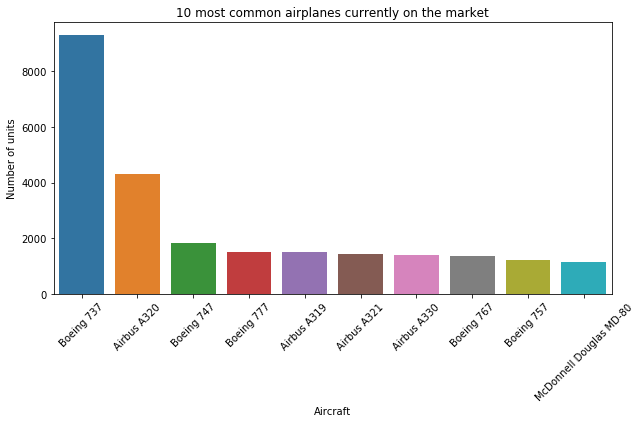

In [16]:
# to plot the results above

# to configure the plot
plt.figure(figsize=(10,5)) # to change size of graph
sns.barplot(x=dataset2['Aircraft Type'], y=dataset2['Total']) # to define x and y axis
plt.xticks(rotation= 45) # to rotate labels on x axis
plt.xlabel('Aircraft') # to name x label
plt.ylabel('Number of units') # to name y label
plt.title('10 most common airplanes currently on the market') # to add a title to plot

# to plot the results
plt.show()

### What are the 10 most expensive airplanes on the market?

In [17]:
# What are the 10 most expensive airplanes on the market?

    # using the groupby function again
dataset3 = dataset.groupby('Aircraft Type')['Unit Cost ($M)'].mean().reset_index() # even though it seems that each aicraft model always costs the same amount from looking briefly at the data, we cannot make that assumption and therefore this line of code computes the average price of each aicraft model
dataset3 = dataset3.sort_values(by='Unit Cost ($M)', ascending=False) # to sort the dataframe by the Total column
dataset3 = dataset3.reset_index(drop=True) # to reindex starting at 0
dataset3['Unit Cost ($M)'] = dataset3['Unit Cost ($M)'].round(decimals=1) # to round the values in the second column to 1 decimal
dataset3 = dataset3.head(n=10) # to only keep the relevant records in the dataset

print("The 10 most expensive airplanes on the market are:")
display(dataset3)

The 10 most expensive airplanes on the market are:


,Aircraft Type,Unit Cost ($M)
0,Airbus A380,433.0
1,Boeing 777-300,320.0
2,Boeing 747,316.0
3,Airbus A350 XWB,312.0
4,Airbus A350,312.0
5,Airbus A350-900,308.0
6,Boeing 777,295.0
7,Boeing 787 Dreamliner,265.0
8,Boeing 787,265.0
9,Airbus A330,235.5


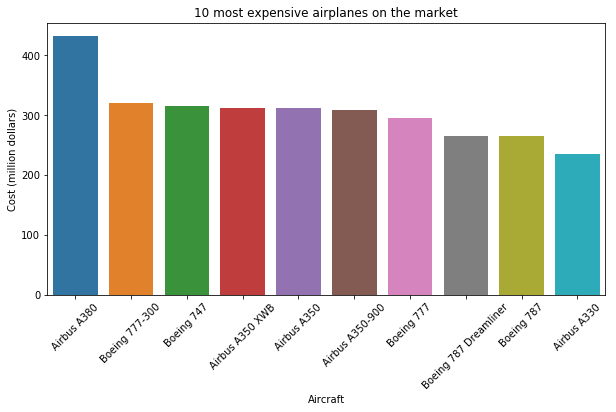

In [18]:
# to plot the results above

# to configure the plot
plt.figure(figsize=(10,5)) # to change size of graph
sns.barplot(x=dataset3['Aircraft Type'], y=dataset3['Unit Cost ($M)']) # to define x and y axis
plt.xticks(rotation= 45) # to rotate labels on x axis
plt.xlabel('Aircraft') # to name x label
plt.ylabel('Cost (million dollars)') # to name y label
plt.title('10 most expensive airplanes on the market') # to add a title to plot

# to plot the results
plt.show()

### What are the 10 biggest airline groups currently existing (in terms of fleet)?

In [19]:
# What are the 10 biggest airline groups currently existing (in terms of fleet)?

    # using the groupby function again
dataset4 = dataset.groupby('Parent Airline')['Total'].sum().reset_index()
dataset4 = dataset4.sort_values(by='Total', ascending=False) # to sort the dataframe by the Total column
dataset4 = dataset4.reset_index(drop=True) # to reindex starting at 0
dataset4['Total'] = dataset4['Total'].astype(int) # to convert values in the Total column from float to int to get rid of decimals
dataset4 = dataset4.head(n=10) # to only keep the relevant records in the dataset

print("The 10 biggest airline groups currently existing in terms of fleet are:")
display(dataset4)

The 10 biggest airline groups currently existing in terms of fleet are:


,Parent Airline,Total
0,American Airlines,2679
1,Lufthansa,1728
2,Delta Airlines,1684
3,IAG,1517
4,United Airlines,1470
5,Air France/KLM,1278
6,Southwest Airlines,952
7,Air China,948
8,China Eastern Airlines,847
9,China Southern Airlines,711


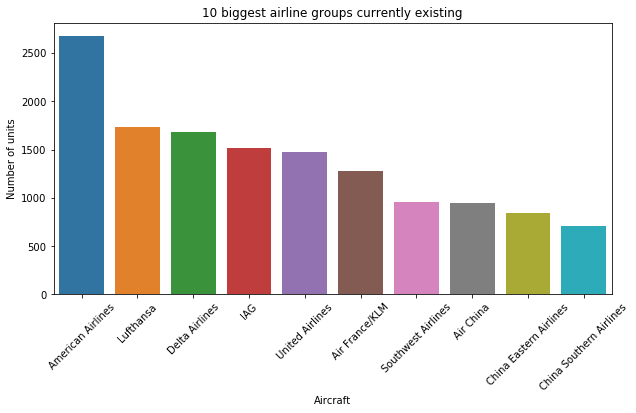

In [20]:
# to plot the results above

# to configure the plot
plt.figure(figsize=(10,5)) # to change size of graph
sns.barplot(x=dataset4['Parent Airline'], y=dataset4['Total']) # to define x and y axis
plt.xticks(rotation= 45) # to rotate labels on x axis
plt.xlabel('Aircraft') # to name x label
plt.ylabel('Number of units') # to name y label
plt.title('10 biggest airline groups currently existing') # to add a title to plot

# to plot the results
plt.show()

### How much does a Boeing 737 cost?

In [21]:
# Then, how much does a Boeing 737 cost considering that it is not in the list of the 10 most expensive planes...
# ...and yet it's the most common/widely used airplane in the world.
# Let's create a short program that takes a user's input (an aircraft type) and displays its average cost.

# For the program above, we'll once again assume that the cost of the same aircraft can vary according to different airlines (it could evolve over time, the sales tax could vary, etc.)
# Therefore, we will compute the average cost of every unique cost of that aircraft type and display the result.

# program
aircraft = input("What aircraft do you want to know the cost of?\n") # for example, try entering: Boeing 737 (when prompted)
newList = []
for index, row in dataset.iterrows():
    if row['Aircraft Type'] == aircraft:
        newList.append(row['Unit Cost ($M)'])

averagecost = sum(newList)/len(newList)
print("The average cost of a %s is $%g million." % (aircraft, averagecost))

The average cost of a Boeing 737 is $74 million.


### Which airlines operate/plan to operate the Airbus A380 and the Boeing 747?

In [22]:
# Since the the Airbus A380 and the Boeing 747 are the largest passenger aircraft currently on the market...
# ... which airlines operate or plan to operate then?


# Airbus A380
print("AIRBUS A380 FLEET WORLDWIDE:")
emptyList = []
for index, row in dataset.iterrows():
    if row['Aircraft Type'] == 'Airbus A380' and row['Total'] > 0 or row['Aircraft Type'] == 'Airbus A380' and row['Orders'] > 0:
        airline = row['Airline']
        total = row['Total']
        orders = row['Orders']
        emptyList.append([airline, total, orders])
        
airbusA380 = pd.DataFrame(emptyList, columns=['airline','current','orders'])
airbusA380 = airbusA380.sort_values(by='current', ascending=False).reset_index(drop=True) # to sort by current and reindex starting at 0
display(airbusA380.head(n=30)) # to show first 30 records (there might be less)


# Boeing 747
print("\n\nBOEING 747 FLEET WORLDWIDE: ")
emptyList = []
for index, row in dataset.iterrows():
    if row['Aircraft Type'] == 'Boeing 747' and row['Total'] > 0 or row['Aircraft Type'] == 'Boeing 747' and row['Orders'] > 0:
        airline = row['Airline']
        total = row['Total']
        orders = row['Orders']
        emptyList.append([airline, total, orders])
        
boeing747 = pd.DataFrame(emptyList, columns=['airline','current','orders'])
boeing747 = boeing747.sort_values(by='current', ascending=False).reset_index(drop=True) # to sort by current and reindex starting at 0
display(boeing747.head(n=30)) # to show first 30 records (there might be less)

AIRBUS A380 FLEET WORLDWIDE:


,airline,current,orders
0,Emirates,102.0,54.0
1,Singapore Airlines,21.0,5.0
2,Lufthansa,14.0,0.0
3,British Airways,12.0,0.0
4,Qantas Airways,12.0,0.0
5,Air France,10.0,0.0
6,Korean Air,10.0,0.0
7,Etihad Airways,9.0,2.0
8,Qatar Airways,9.0,4.0
9,Asiana Airlines,6.0,1.0




BOEING 747 FLEET WORLDWIDE: 


,airline,current,orders
0,Saudi Arabian Airlines,128.0,0.0
1,Japan Airlines,114.0,0.0
2,British Airways,101.0,0.0
3,Korean Air,88.0,7.0
4,United Airlines,88.0,0.0
5,Cathay Pacific,84.0,0.0
6,Singapore Airlines,80.0,0.0
7,Lufthansa,80.0,0.0
8,Atlas Air,77.0,0.0
9,Air France,73.0,0.0


### Are the 10 biggest airline groups also the ones that spent the largest amounts of money to buy aircraft? 

In [23]:
# Are the 10 biggest airline groups also the ones that spent the largest amount of money to buy aircraft? 
dataset5 = dataset.groupby('Parent Airline')['Total Cost ($M)'].sum().reset_index()
dataset5 = dataset5.sort_values(by='Total Cost ($M)', ascending=False) # to sort the dataframe by the Total column
dataset5 = dataset5.reset_index(drop=True) # to reindex starting at 0
dataset5['Total Cost ($M)'] = dataset5['Total Cost ($M)'].astype(int) # to convert values in the Total column from float to int to get rid of decimals
dataset5 = dataset5.head(n=10) # to only keep the relevant records in the dataset

print("The 10 airlines spending the largest amount of money to buy aircraft:")
display(dataset5)

The 10 airlines spending the largest amount of money to buy aircraft:


,Parent Airline,Total Cost ($M)
0,American Airlines,121013
1,Lufthansa,95741
2,United Airlines,90037
3,IAG,88814
4,Emirates,85191
5,Delta Airlines,84585
6,Air China,80232
7,Air France/KLM,75128
8,China Eastern Airlines,64702
9,China Southern Airlines,61370


In [24]:
# Thank you!